<a href="https://colab.research.google.com/github/irravasyuk/SQL_2/blob/master/%D0%94%D0%97_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оберіть одне завдання на вибір

# Завдання 1

За допомогою сегментації зображень замінітть фон для зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/humans.jpg

на фон з https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/forest.jpg

* отримайте маску для зображення людей, де `True` - піксель класу людини, `False` - піксель іншого класу
* зробіть зображення лісу такого ж розміру як і зображення людей
* застосуйте маску щоб змінити значення пікселів зображення лісу на пікселі зображення людей
* Якщо результат поганий можете спробувати використати маску для класу `__background`

In [6]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision import transforms

img = read_image("/content/humans.jpg")


weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

preprocess = weights.transforms(resize_size=None)

batch = preprocess(img)
batch = batch.unsqueeze(0)

with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:00<00:00, 148MB/s]


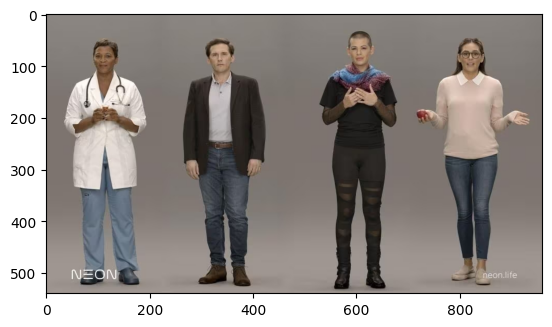

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img.permute(1, 2, 0))

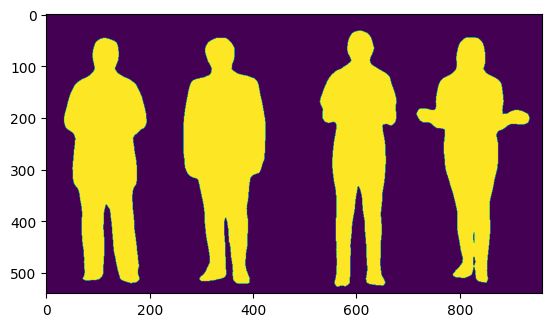

In [8]:
plt.imshow(mask)

In [9]:
mask.unique()

tensor([ 0, 15])

In [10]:
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

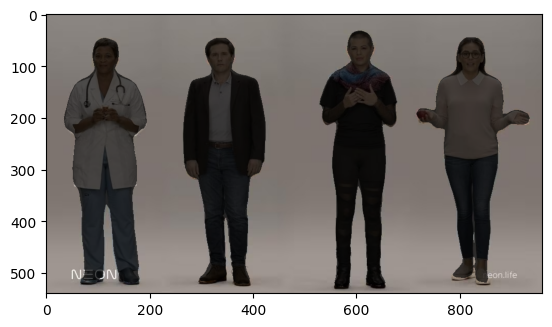

In [11]:
from torchvision.utils import draw_segmentation_masks

person_mask = mask == class_to_idx['person']

masked_img = draw_segmentation_masks(img, person_mask, alpha=0.7)

plt.imshow(masked_img.permute(1, 2, 0))

In [12]:
forest_img = read_image("/content/forest.jpg")
forest_img = transforms.Resize((540, 960))(forest_img)

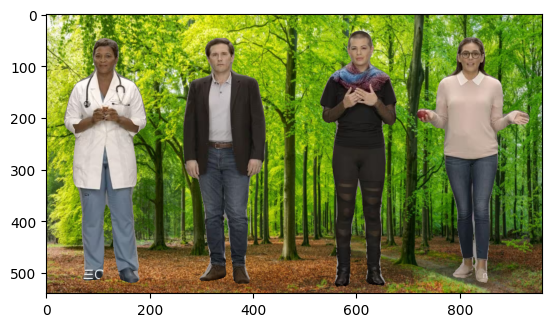

In [13]:
forest_img[:,person_mask] = img[:,person_mask]
plt.imshow(forest_img.permute(1, 2, 0))

# Завдання 2

Проведіть детекцію об'єктів для відео

https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/Highway%20driving%20during%20the%20day%20front%20view%20camera%20driving%20plate%204k%20footage.mp4

Підберіть параметри для якісного виявлення машин та знаків
Код для перетворення набору зображень у відео є нижче

[документація](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html)

In [14]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 25.5 MB/s eta 0:00:00


In [15]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.predict(source='/content/Highway driving during the day front view camera driving plate 4k footage.mp4',
                        conf = 0.2,
                        iou=0.7)

result = results[0]

100%|██████████| 6.25M/6.25M [00:00<00:00, 91.3MB/s]




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

WARNING ⚠️ NMS time limit 2.050s exceeded
video 1/1 (frame 1/250) /content/Highway driving during the day front view camera driving plate 4k footage.mp4: 640x384 3 cars, 332.2ms
video 1/1 (frame 2/250) /content/Highway driving during the day front view camera driving plate 4k footage.mp4: 640x384 2 cars, 1 traffic light, 18.9ms
video 1/1 (frame 3/250) /content/Highway driving during the day front view camera driving plate 4k footage.mp4: 640x384 2 cars

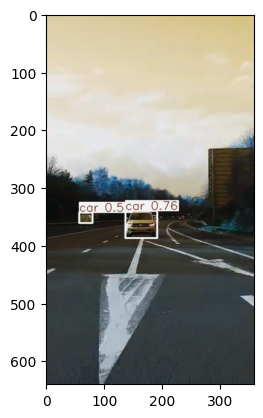

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for result in results:
    frames.append([plt.imshow(result.plot())])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('output.mp4')
plt.show()

In [18]:
#https://youtu.be/i5PDg6hdusw

# Завдання 3

Згенеруйте зображення на основі тексту

[документація](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)

In [19]:
!pip install -q diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.2 MB/s eta 0:00:00


In [21]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

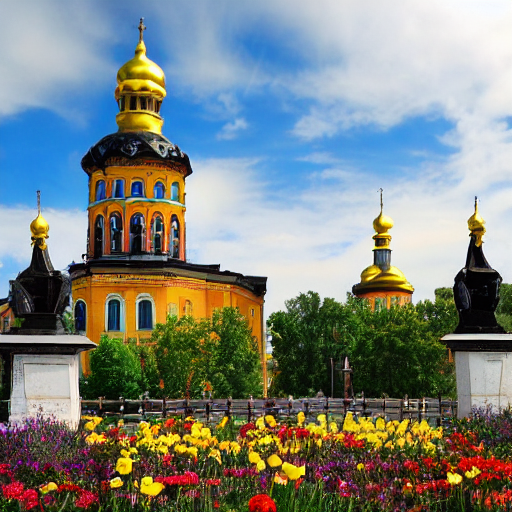

In [33]:
image = pipeline(
	"Ukraine"
).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

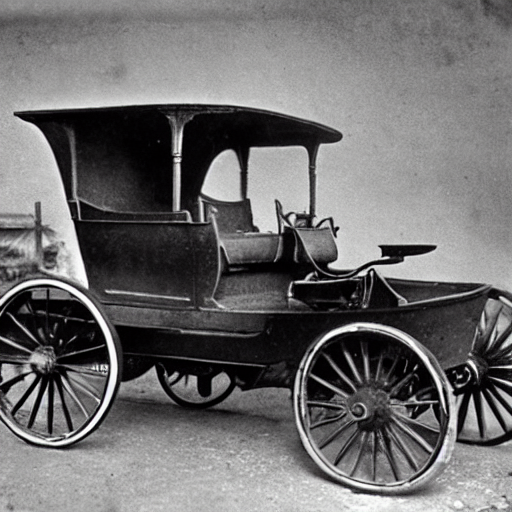

In [23]:
image = pipeline(
	"a car of the 19th century"
).images[0]
image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

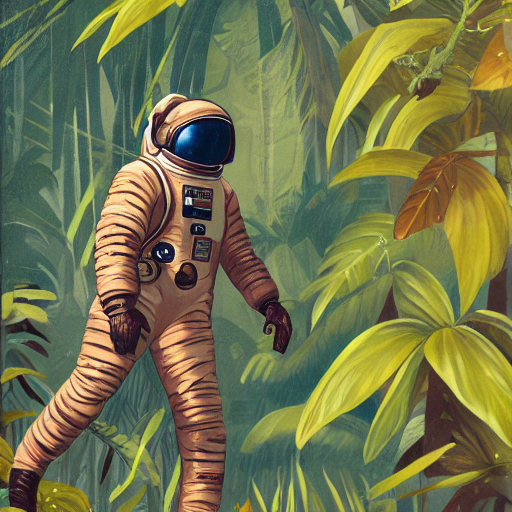

In [34]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image
